In [1]:
!pip install pandas

In [2]:
import pandas as pd
import os

#### 충주 데이터 (감우리 발전소 예시로)

In [3]:
weather_path = '../../data/weather_data/preprocessing_data'
# weather_path안에 있는 모든 csv 불러와서 concat하기
csv_files = [f for f in os.listdir(weather_path) if f.endswith('.csv')]
df_list = []
for file in csv_files:
    file_path = os.path.join(weather_path, file)
    df = pd.read_csv(file_path)
    df_list.append(df)

# 모든 csv 파일을 하나의 데이터프레임으로 합치기
weather_data = pd.concat(df_list, ignore_index=True) 

# sort by date 
weather_data = weather_data.sort_values(by=['date','time']).reset_index(drop=True)
weather_data

,date,time,temperature,humidity,stnNm,rn,ws,wd,pv,pa,ps,ss,icsr,dc10Tca,dc10LmcsCa,lcsCh,vs,ts,sunrise,sunset
0,20130101,00:00,1.3,77.0,성산,NaN,3.2,340.0,5.2,1019.1,1021.3,NaN,NaN,3.0,3.0,10.0,2000.0,0.0,07:38,17:37
1,20130101,00:00,-7.5,89.0,진주,NaN,0.0,0.0,3.1,1017.9,1021.8,NaN,NaN,0.0,0.0,NaN,1500.0,-2.2,07:36,17:26
2,20130101,00:00,-4.1,39.0,동해,NaN,3.0,320.0,1.8,1014.7,1019.8,NaN,NaN,NaN,NaN,NaN,NaN,-5.8,07:38,17:16
3,20130101,00:00,-11.5,82.0,영월,NaN,0.0,0.0,2.1,991.5,1023.0,NaN,NaN,NaN,NaN,NaN,NaN,-2.1,07:40,17:19
4,20130101,00:00,4.2,56.0,서귀포,NaN,1.1,320.0,4.6,1015.1,1021.2,NaN,NaN,8.0,8.0,10.0,2500.0,2.2,07:37,17:37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959411,20250228,23:00,12.1,80.0,서귀포,NaN,1.6,360.0,11.2,1015.1,1021.4,NaN,NaN,10.0,10.0,5.0,2432.0,10.7,07:03,18:30
959412,20250228,23:00,11.1,79.0,제주,NaN,2.7,180.0,10.4,1017.6,1020.1,NaN,NaN,9.0,9.0,3.0,1701.0,10.7,07:04,18:30
959413,20250228,23:00,7.3,79.0,전주,NaN,0.4,0.0,8.0,1013.8,1021.3,NaN,NaN,0.0,0.0,NaN,1431.0,2.3,07:03,18:25
959414,20250228,23:00,3.7,94.0,인천,NaN,1.6,360.0,7.5,1012.7,1021.3,NaN,NaN,0.0,0.0,NaN,411.0,2.5,07:06,18:26


In [4]:
weather_data[weather_data['year']=='2023']

KeyError: 'year'

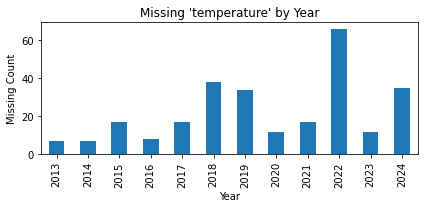

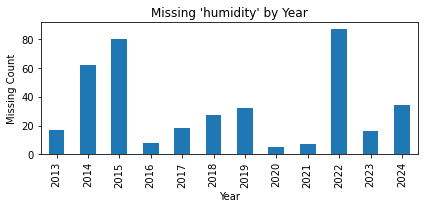

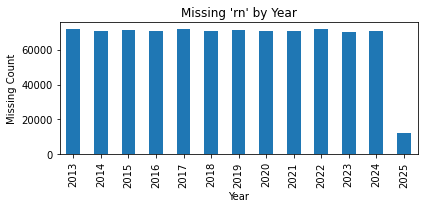

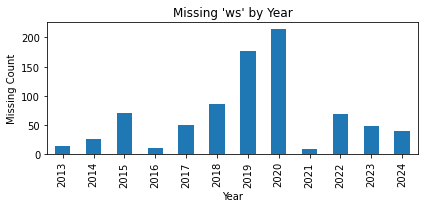

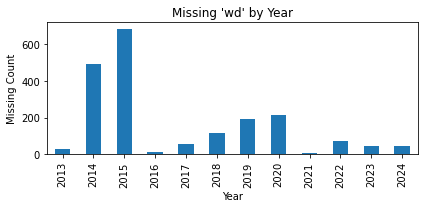

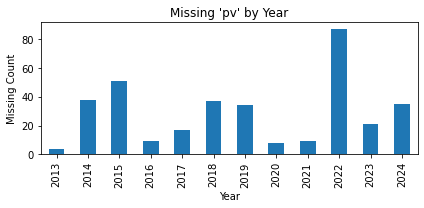

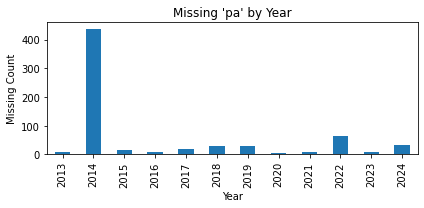

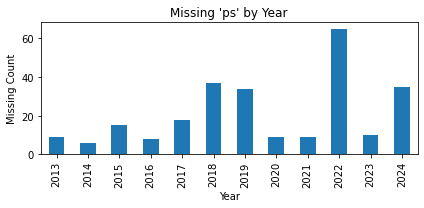

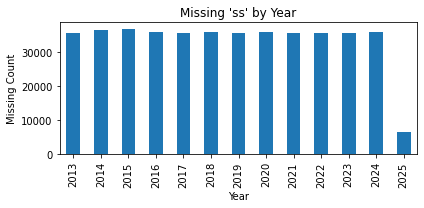

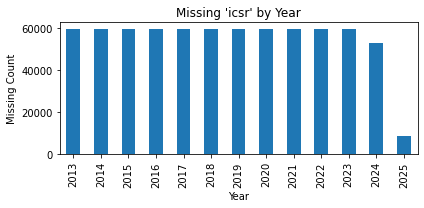

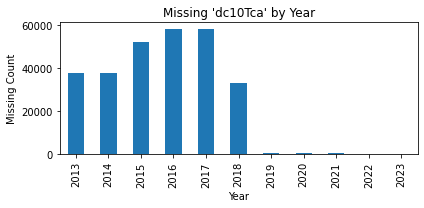

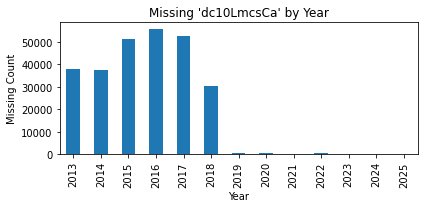

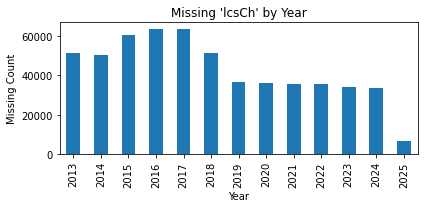

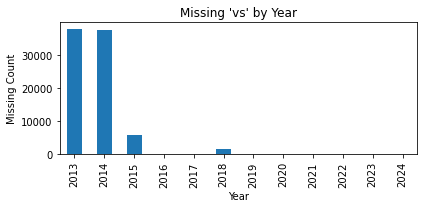

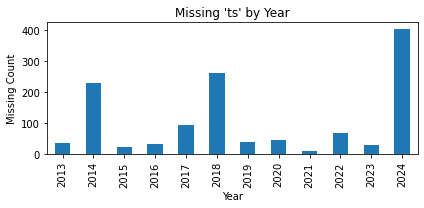

In [5]:
# date에서 year 정보 추출하여 새로운 컬럼 추가
weather_data['year'] = weather_data['date'].astype(str).str[:4]

import matplotlib.pyplot as plt

# temperature부터 오른쪽으로 쭉 모든 column에 대해 결측치의 연도별 분포 시각화
start_col = weather_data.columns.get_loc('temperature')
cols_to_check = weather_data.columns[start_col:]

for col in cols_to_check:
    # 결측치인 행만 추출
    missing_rows = weather_data[weather_data[col].isna()]
    if len(missing_rows) > 0:
        # 연도별 결측치 개수 세기
        year_counts = missing_rows['year'].value_counts().sort_index()
        
        plt.figure(figsize=(6,3))
        year_counts.plot(kind='bar')
        plt.title(f"Missing '{col}' by Year")
        plt.xlabel('Year')
        plt.ylabel('Missing Count')
        plt.tight_layout()
        plt.show()


todo
1. 각 데이터가 다음 분류 중에 어디에 해당하는지 확인: numerical value, categorical value, 시간값 
2. 분류별 전처리 기법 선정
(is_missing_XXX 추가해야하는 데이터 있을지)

In [6]:
weather_data

,date,time,temperature,humidity,stnNm,rn,ws,wd,pv,pa,...,ss,icsr,dc10Tca,dc10LmcsCa,lcsCh,vs,ts,sunrise,sunset,year
0,20130101,00:00,1.3,77.0,성산,NaN,3.2,340.0,5.2,1019.1,...,NaN,NaN,3.0,3.0,10.0,2000.0,0.0,07:38,17:37,2013
1,20130101,00:00,-7.5,89.0,진주,NaN,0.0,0.0,3.1,1017.9,...,NaN,NaN,0.0,0.0,NaN,1500.0,-2.2,07:36,17:26,2013
2,20130101,00:00,-4.1,39.0,동해,NaN,3.0,320.0,1.8,1014.7,...,NaN,NaN,NaN,NaN,NaN,NaN,-5.8,07:38,17:16,2013
3,20130101,00:00,-11.5,82.0,영월,NaN,0.0,0.0,2.1,991.5,...,NaN,NaN,NaN,NaN,NaN,NaN,-2.1,07:40,17:19,2013
4,20130101,00:00,4.2,56.0,서귀포,NaN,1.1,320.0,4.6,1015.1,...,NaN,NaN,8.0,8.0,10.0,2500.0,2.2,07:37,17:37,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959411,20250228,23:00,12.1,80.0,서귀포,NaN,1.6,360.0,11.2,1015.1,...,NaN,NaN,10.0,10.0,5.0,2432.0,10.7,07:03,18:30,2025
959412,20250228,23:00,11.1,79.0,제주,NaN,2.7,180.0,10.4,1017.6,...,NaN,NaN,9.0,9.0,3.0,1701.0,10.7,07:04,18:30,2025
959413,20250228,23:00,7.3,79.0,전주,NaN,0.4,0.0,8.0,1013.8,...,NaN,NaN,0.0,0.0,NaN,1431.0,2.3,07:03,18:25,2025
959414,20250228,23:00,3.7,94.0,인천,NaN,1.6,360.0,7.5,1012.7,...,NaN,NaN,0.0,0.0,NaN,411.0,2.5,07:06,18:26,2025


In [23]:
weather_data['dc10LmcsCa'].value_counts()

0.0     24077
9.0      7587
1.0      4726
8.0      3750
7.0      3284
6.0      2971
10.0     2763
2.0      2550
3.0      2405
5.0      2341
4.0      2278
Name: dc10LmcsCa, dtype: int64

In [7]:
# 각 column별 결측치 개수와 결측 퍼센트 계산
missing_percent = round(weather_data.isnull().mean() * 100,1)
missing_count = weather_data.isnull().sum()

# 결과를 DataFrame으로 정리
missing_df = pd.DataFrame({
    'missing_percent': missing_percent,
    'missing_count': missing_count,
}).reset_index().rename(columns={'index': 'column'})

# 결측 퍼센트 내림차순 정렬
#missing_df = missing_df.sort_values(by='missing_count', ascending=False)
missing_df


,column,missing_percent,missing_count
0,date,0.0,0
1,time,0.0,0
2,temperature,0.0,270
3,humidity,0.0,393
4,stnNm,0.0,0
5,rn,90.1,864792
6,ws,0.1,816
7,wd,0.2,1976
8,pv,0.0,350
9,pa,0.1,662
